## Reading the file

In [6]:
import numpy as np
import pandas as pd
df = pd.read_excel('E:/cidc/Rotten_Tomatoes_Movies3.xls')
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

There are 16638 rows and 16 columns. We see that there are many columns has null values, so we could either remove it or impute it in our further analysis

## Initial data inspection

### Missing value visualization

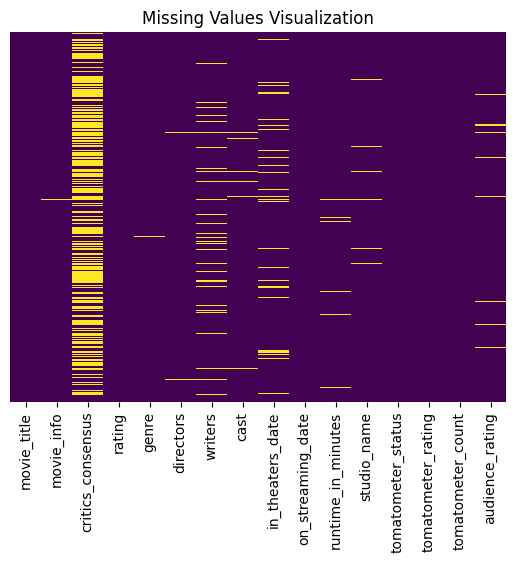

Missing values Percentage 
 movie_title            0.000000
movie_info             0.144248
critics_consensus     50.060103
rating                 0.000000
genre                  0.102176
directors              0.685179
writers                8.107946
cast                   1.706936
in_theaters_date       4.898425
on_streaming_date      0.012021
runtime_in_minutes     0.931602
studio_name            2.500301
tomatometer_status     0.000000
tomatometer_rating     0.000000
tomatometer_count      0.000000
audience_rating        1.514605
dtype: float64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull()
sns.heatmap(missing_values, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Visualization')
plt.show()

print("Missing values Percentage \n",(df.isnull().sum()/len(df))*100)

1. 'critics_consensus' has more than 50% null values, so we can either drop the entire column. We can decide that in further analysis
2. There are many columns which has less than 10% of null values, so we can fill those missing values

### Drop and fill missing values

In [9]:
data=df.copy()
data['critics_consensus'].fillna('No Reviews',inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   16638 non-null  object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

Since 'critics_consensus' had more than 50% of null values, I dropped it

In [11]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist() 
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()    

print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns)

for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in numeric_columns:
    data[col].fillna(data[col].mean(), inplace=True)

print(data.info())

Categorical columns: ['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']
Numeric columns: ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'audience_rating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16638 non-null  object        
 2   critics_consensus   16638 non-null  object        
 3   rating              16638 non-null  object        
 4   genre               16638 non-null  object        
 5   directors           16638 non-null  object        
 6   writers             16638 non-null  object        
 7   cast                16638 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_strea

All numeric columns and categorical columns are filled with mean and mode values respectively

In [12]:
# Find the most common date (mode) in both columns
common_date = data[['in_theaters_date', 'on_streaming_date']].stack().mode()[0]

data['in_theaters_date'].fillna(common_date, inplace=True)
data['on_streaming_date'].fillna(common_date, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16638 non-null  object        
 2   critics_consensus   16638 non-null  object        
 3   rating              16638 non-null  object        
 4   genre               16638 non-null  object        
 5   directors           16638 non-null  object        
 6   writers             16638 non-null  object        
 7   cast                16638 non-null  object        
 8   in_theaters_date    16638 non-null  datetime64[ns]
 9   on_streaming_date   16638 non-null  datetime64[ns]
 10  runtime_in_minutes  16638 non-null  float64       
 11  studio_name         16638 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

### Visualization for numeric and categorical columns

#### Numerical column visualization

       runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        16638.000000        16638.000000       16638.000000   
mean           102.391494           60.466522          56.607104   
std             24.911150           28.587230          66.383800   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000   
50%             99.000000           66.000000          28.000000   
75%            111.000000           86.000000          76.000000   
max           2000.000000          100.000000         497.000000   

       audience_rating  
count     16638.000000  
mean         60.470829  
std          20.306805  
min           0.000000  
25%          45.000000  
50%          62.000000  
75%          77.000000  
max         100.000000  


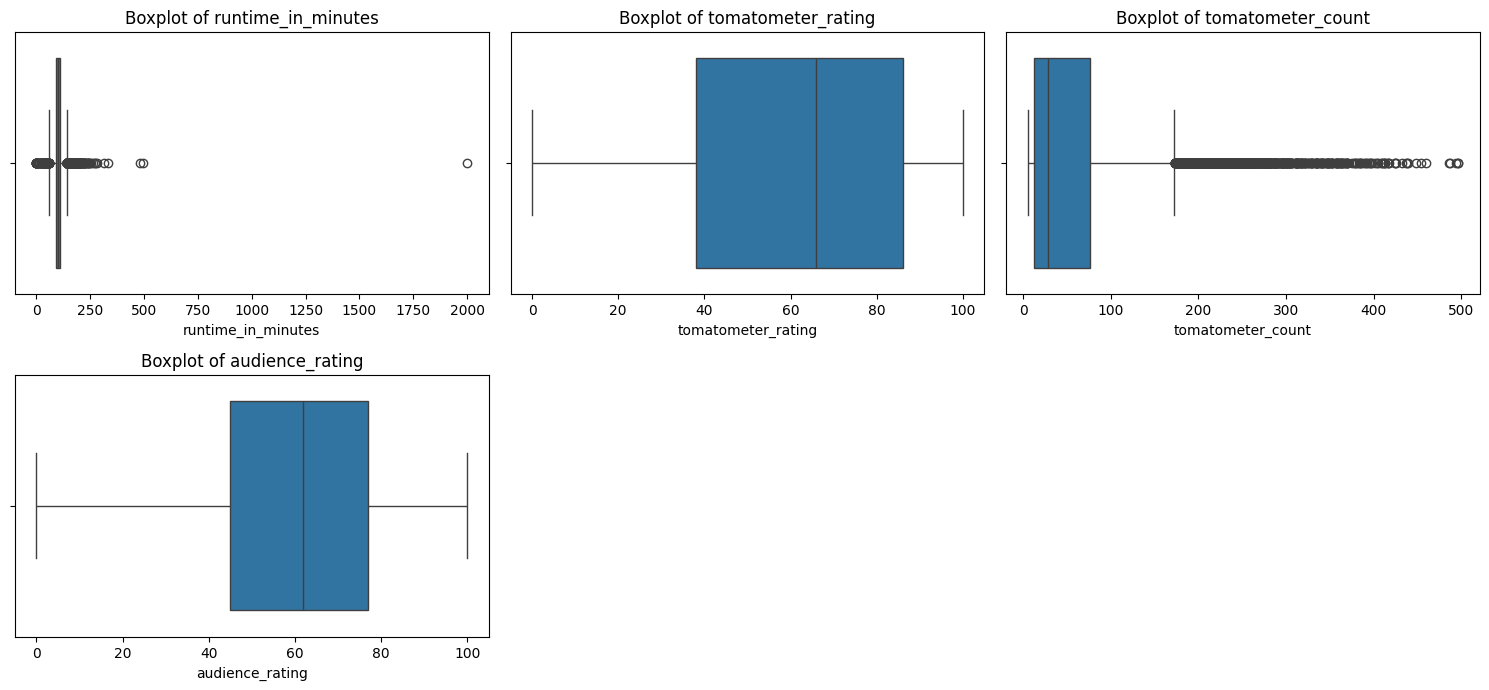

In [13]:
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
print(data[numeric_columns].describe())

plt.figure(figsize=(15, 10))  

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout() 
plt.show()

'runtime_in_minutes' and 'tomatometer_count' has outliers, so we can remove outliers

In [14]:
Q1 = data[numeric_columns].quantile(0.25) 
Q3 = data[numeric_columns].quantile(0.75)  
IQR = Q3 - Q1 


lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

data_no_outliers = data[
    ~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)
]

print(data_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14840 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         14840 non-null  object        
 1   movie_info          14840 non-null  object        
 2   critics_consensus   14840 non-null  object        
 3   rating              14840 non-null  object        
 4   genre               14840 non-null  object        
 5   directors           14840 non-null  object        
 6   writers             14840 non-null  object        
 7   cast                14840 non-null  object        
 8   in_theaters_date    14840 non-null  datetime64[ns]
 9   on_streaming_date   14840 non-null  datetime64[ns]
 10  runtime_in_minutes  14840 non-null  float64       
 11  studio_name         14840 non-null  object        
 12  tomatometer_status  14840 non-null  object        
 13  tomatometer_rating  14840 non-null  int64     

#### Categorical column visualization

In [15]:
data['rating'].unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'PG-13)', 'NC17', 'R)'],
      dtype=object)

In [16]:
data['rating'] = data['rating'].str.replace('PG-13\)', 'PG-13', regex=True)
data['rating'] = data['rating'].str.replace('R\)', 'R', regex=True)

print(data['rating'].unique())

['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


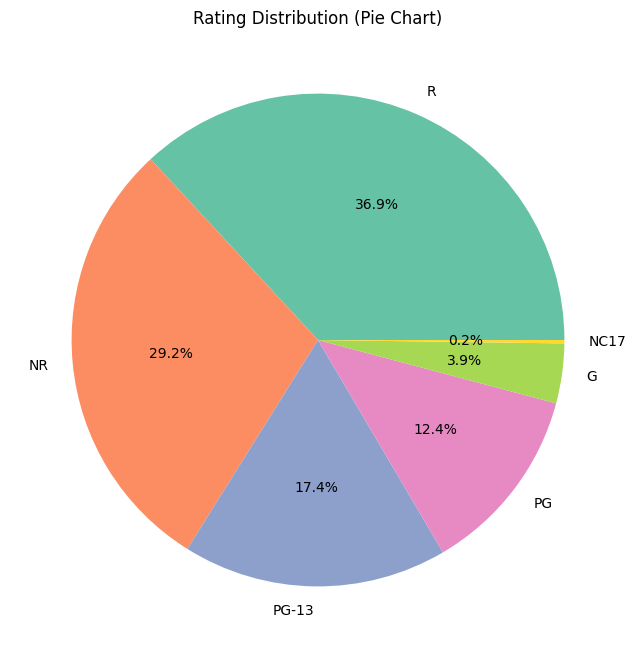

In [17]:
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(rating_counts)))
plt.title('Rating Distribution (Pie Chart)')
plt.show()

Overall Observations:

Dominance of R-rated Movies: The chart reveals that a significant portion of the movie sample, accounting for 36.9%, falls under the R rating category. This suggests that the sample leans towards movies intended for mature audiences.

Prevalence of PG-13 Movies: Following R, the PG-13 rating holds the second-largest share with 29.2%. This implies a substantial presence of movies suitable for teenagers and adults.

Limited Presence of Other Ratings: The remaining ratings (NR, G, PG, NC-17) constitute a smaller portion of the sample. Notably, the G rating (3.9%) and NC-17 rating (0.2%) are relatively minor compared to R and PG-13

In [18]:
data['genre'].unique()

array(['Action & Adventure, Comedy, Drama, Science Fiction & Fantasy',
       'Comedy', 'Comedy, Romance', ...,
       'Art House & International, Romance',
       'Action & Adventure, Drama, Horror, Kids & Family, Mystery & Suspense',
       'Animation, Drama, Romance'], dtype=object)

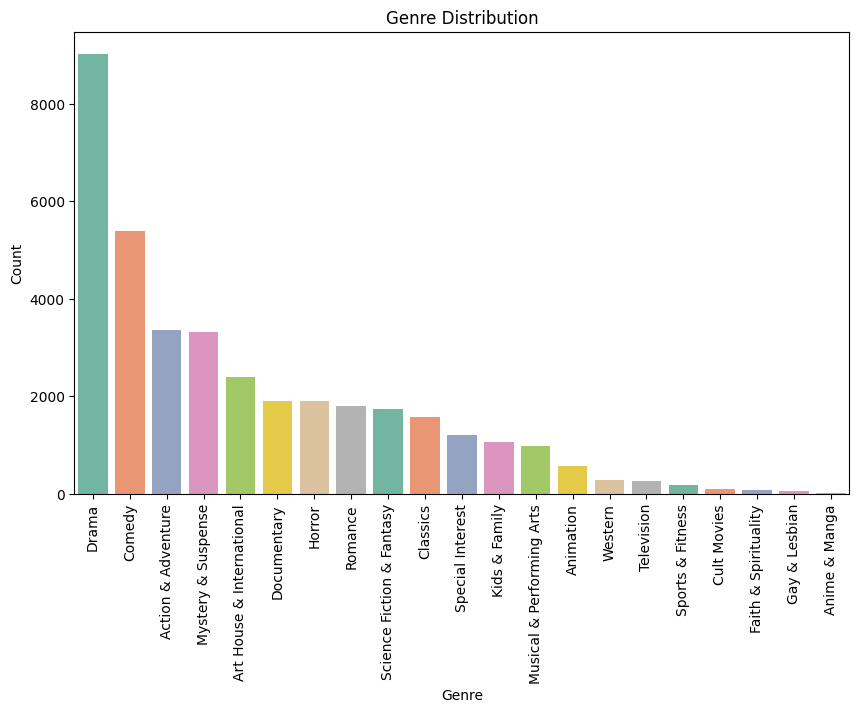

In [19]:
import seaborn as sns
genres_list = data['genre'].str.split(', ').explode()
genre_counts = genres_list.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Genre Distribution:

Drama (9023 movies): Drama reigns supreme as the most prevalent genre, showcasing its broad appeal and extensive representation in the film industry.

Comedy (5385 movies): Comedy holds a strong presence, highlighting its popularity for light-hearted entertainment and its ability to attract a wide audience.

Action & Adventure (3353 movies): Action & Adventure films are well-represented, indicating a significant demand for high-energy, dynamic content and thrilling experiences.

Mystery & Suspense (3331 movies): Mystery & Suspense genres have a substantial presence, suggesting a strong interest in plot-driven narratives, suspenseful thrillers, and intriguing mysteries.

Art House & International (2407 movies): Art House & International films have a notable presence, reflecting an interest in niche, independent, and culturally diverse cinema.

Documentary (1916 movies): Documentary films are well-represented, indicating a growing interest in non-fiction storytelling and exploring real-world subjects.

Horror (1905 movies): Horror is a popular genre, suggesting a strong audience for suspense, thrills, and supernatural or terrifying experiences.

Romance (1807 movies): Romance is a widely followed genre, indicating a strong audience for emotionally-driven narratives, love stories, and relationship-focused films.

Science Fiction & Fantasy (1743 movies): Sci-Fi & Fantasy genres are well-represented, indicating growing audience interest in futuristic, imaginative, and fantastical storytelling.

Other Genres (1578-1219 movies): Genres like Classics, Special Interest, Kids & Family, and Musical & Performing Arts have moderate representation, indicating specific audience preferences for these genres.

Niche Genres (565 movies or less): Genres like Animation, Western, Television, Sports & Fitness, Cult Movies, Faith & Spirituality, Gay & Lesbian, and Anime & Manga represent smaller but dedicated audiences, showcasing the diversity and specialized interests within the film industry.e film industry.

#### Top 10 genre combinations

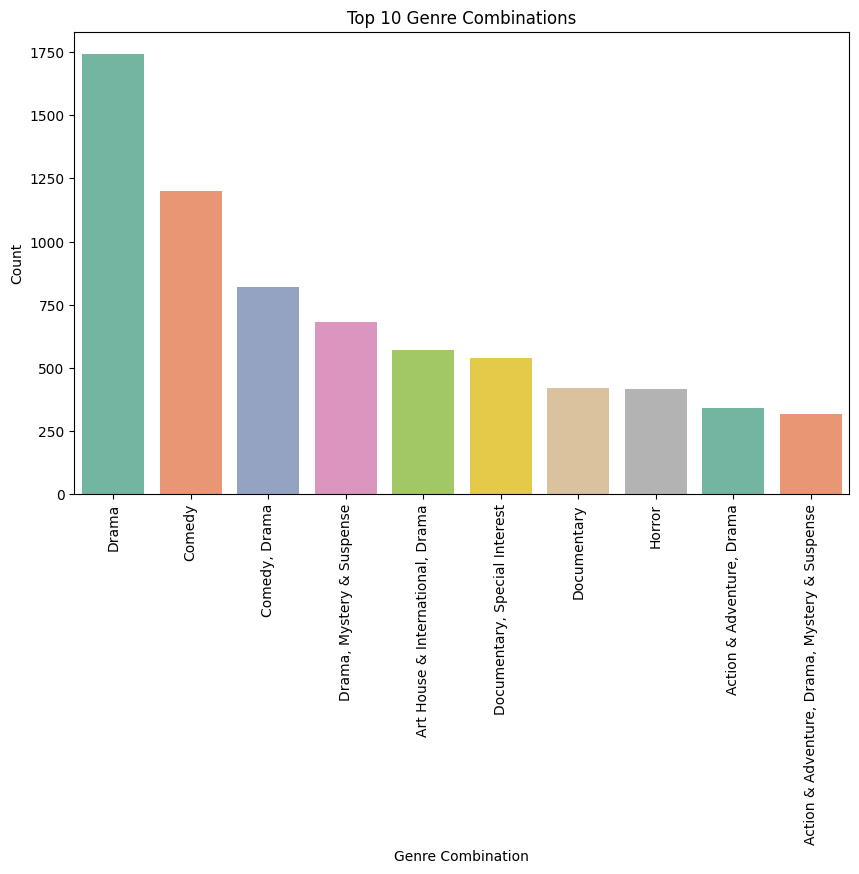

In [21]:
genre_combinations = data['genre'].value_counts()

top_genre_combinations = genre_combinations.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genre_combinations.index, y=top_genre_combinations.values, hue=top_genre_combinations.index, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title('Top 10 Genre Combinations')
plt.xlabel('Genre Combination')
plt.ylabel('Count')
plt.show()


The most common genre in the dataset is Drama, followed by Comedy and Drama-comedy combinations, indicating that emotionally-driven narratives and light-hearted genres are the most popular. Additionally, genre combinations like Action & Adventure with Drama and Mystery & Suspense with Drama suggest a preference for multi-genre films blending action, drama, and suspense.

#### Analysing Genre v/s time

In [ ]:
data['in_theaters_date'] = pd.to_datetime(data['in_theaters_date'], errors='coerce')
data['year'] = data['in_theaters_date'].dt.year

genre_by_year = data.groupby('year')['genre'].apply(lambda x: x.str.split(', ').explode().value_counts()).unstack().fillna(0)

top_10_years = genre_by_year.sum(axis=1).nlargest(10).index
genre_by_year_top_10 = genre_by_year.loc[top_10_years]

# Plot the data
genre_by_year_top_10.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Genre Distribution Over Top 10 Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1. **Dominant Genres**: Certain genres like **Drama**, **Comedy**, and **Science Fiction & Fantasy** seem to consistently dominate across the years shown, as they occupy a significant portion of the bars.

2. **Consistency Across Years**: The genre distribution appears relatively consistent across the top 10 years, with no single year showing a drastic deviation in the proportions of genre popularity.

3. **Yearly Trends**: Some genres (e.g., **Documentary** or **Horror**) appear to have smaller and consistent contributions over time, indicating niche popularity.

4. **Overall Output**: Years such as **2007**, **2006**, and **2001** have higher total counts compared to other years in the chart, suggesting those years might have had a higher overall production or data representation in the dataset.

5. **Smaller Genres**: Categories like **Television** and **Western** have minimal contributions, suggesting they were less common during these top t over time.

In [ ]:
top_10_genres = data['genre'].value_counts().nlargest(10).index
filtered_data = data[data['genre'].isin(top_10_genres)]
genre_ratings = filtered_data.groupby('genre')['audience_rating'].mean().sort_values(ascending=False)

genre_ratings_df = genre_ratings.reset_index()
genre_ratings_df.columns = ['genre', 'average_rating']

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_ratings_df, x='genre', y='average_rating', palette='Set2', hue='genre', dodge=False, legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Genres vs Average Audience Ratings')
plt.xlabel('Genre')
plt.ylabel('Average Audience Rating')
plt.show()


**Inferences:**

1. **Documentary and Special Interest films tend to have the highest average audience ratings, while Comedy films have the lowest ratings.** This suggests that audiences may prefer films with factual or thought-provoking content over lighthearted entertainment. 

2. **Drama is a popular genre across different subcategories, consistently appearing in the top 10 genres with varying levels of audience ratings.** This indicates that audiences enjoy films with dramatic narratives, but their preference varies based on the specific combination of e it!** 


In [ ]:
top_10_genres = data['genre'].value_counts().nlargest(10).index
filtered_data = data[data['genre'].isin(top_10_genres)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='runtime_in_minutes', data=filtered_data, hue='genre', palette='Set2', legend=False, dodge=False)
plt.xticks(rotation=45)
plt.title('Top 10 Genres vs Movie Runtime Distribution')
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()

1. **Documentaries and Special Interest films tend to have the longest runtimes, while Comedies are typically shorter.**  

2. **Drama films show a wide range of runtimes, with some being very long and others relatively short.**

In [ ]:
data['cast'].unique()

In [ ]:
actors_list = data['cast'].str.split(', ').explode()
top_actors = actors_list.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.index, y=top_actors.values, hue=top_actors.index, palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.show()


1. **Chris Rock and Samuel L. Jackson's prominence**: These actors dominate the dataset in terms of film appearances, indicating their sustained relevance in the industry, likely due to their long careers and demand in various projects.
   
2. **Skewed distribution**: The significant drop-off after these two actors suggests that the distribution of actor appearances is uneven, with a concentration of appearances by a few high-frequency actors and a majority with fewer appearances. This skewed distribution could suggest disparities in actor roles or casting preferences.

## Feature engineering 

In [ ]:
data.drop(columns='year',inplace=True)

In [ ]:
data['in_theaters_year'] = data['in_theaters_date'].dt.year
data['in_theaters_month'] = data['in_theaters_date'].dt.month
data['on_streaming_year'] = data['on_streaming_date'].dt.year
data['on_streaming_month'] = data['on_streaming_date'].dt.month

month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
data['in_theaters_month'] = data['in_theaters_month'].map(month_mapping).astype('object')
data['on_streaming_month'] = data['on_streaming_month'].map(month_mapping).astype('object')
data['in_theaters_year'] = data['in_theaters_year'].astype('object')
data['on_streaming_year'] = data['on_streaming_year'].astype('object')

data.drop(columns=['in_theaters_date', 'on_streaming_date'], inplace=True)

print("Feature Engineering Completed:")
print(data[['in_theaters_year', 'in_theaters_month', 'on_streaming_year', 'on_streaming_month']].head())

In [ ]:
data.info()

## Train_test_split and Model picking

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pandas as pd

categorical_columns = data.select_dtypes(include=['object', 'category']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

categorical_data = data[categorical_columns]
numerical_data = data[numerical_columns]

In [ ]:
categorical_data.info()

In [ ]:
scaler = StandardScaler()
numerical_data = numerical_data.drop(columns=['audience_rating']) 
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)

In [ ]:
numerical_data_scaled.info()

In [ ]:
audience_rating_scaled = scaler.fit_transform(data[['audience_rating']])
audience_rating_scaled = pd.DataFrame(audience_rating_scaled, columns=['audience_rating'])

In [ ]:
categorical_data.info()

In [ ]:
categorical_Data = pd.get_dummies(categorical_data, columns=['rating'],dtype='int')

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = categorical_Data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for column in object_columns:
    categorical_Data[column] = categorical_Data[column].astype(str)
    categorical_Data[column] = encoder.fit_transform(categorical_Data[column])

categorical_Data.info()

In [ ]:
concatenated_data = pd.concat([audience_rating_scaled, categorical_Data], axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

X = concatenated_data.drop(columns=['audience_rating'])
y = concatenated_data['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}},
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100],
            'max_depth': [None, 10],
            'min_samples_split': [2]
        }},
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {
            'C': [1],
            'kernel': ['rbf'],
            'gamma': ['scale']
        }},
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10],
            'min_samples_split': [2]
        }},
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.1],
            'l1_ratio': [0.5]
        }},
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1]
        }},
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1]
        }}
}

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mape

results = []

for model_name, model_info in models.items():
    grid_search = GridSearchCV(estimator=model_info['model'], param_grid=model_info['params'], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse, rmse, mape = calculate_metrics(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'Test MSE': mse,
        'Test RMSE': rmse,
        'Test MAPE': mape
    })

results_df = pd.DataFrame(results)
print(results_df)
